# Subplots

***Subplots*** ``often useful to compare different subsets of your data side by side. ``

To demonstrate this, we're going to visualize images. We're going to have our figures appear inline in the notebook, so we're specifying inline. We're going to import pandas, NumPy, and Matplotlib. 

In [1]:
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the not
%matplotlib inline

import pandas as pd
import numpy as np

# ``plt`` is an alias for the ``matplotlib.pyplot`` module
import matplotlib.pyplot as plt

***Load Data***

The next thing we have to do is you have to load our dataset, and our dataset is the digits dataset from scikit-learn. They have arranged into a CSV file for convenience. The dataset consists of pixel intensity values for 1,797 images that are eight-by-eight pixels. This means that the dataset has 64 total values per image, and each image is labeled with a number from zero to nine. We're going to load our dataset into panda's data frame by using the read_csv method.

In [2]:
# Load digits dataset
filename = 'digitsDataset.csv'

df =pd.read_csv(filename)

With any dataset, it's always good to check the first couple rows to make sure everything loaded properly. Columns zero to 63 are pixel intensity values for an eight-by-eight image. The label column is what the image is supposed to be. Each row in the dataset represents one image. 


In [3]:
# Columns 0 to 63 are the pixel intensity values for an 8 by 8 image.
# label column is what the image is supposed to be.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


***Show image***

Before we can create a subplot, it's a good idea to know how to visualize one image. To get all the column names for the pixel intensity values, we're going to utilize the df.columns attribute, and what this slice does is it says we want every column except for the last column, which happens to be our labels. 

In [14]:
pixel_colnames = df.columns[: -1]

In [15]:
pixel_colnames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

The next thing we're going to do is we're going to do df.lock. We're going to specify that we want the first image in our data dataset, and we want all of its pixel intensity values. I should note that this is not yet the correct form for viewing the images. As you can see, we don't yet have an eight-by-eight array. 

In [16]:
# Get all columns except the label column for the first image
image_values = df.loc[0, pixel_colnames].values

In [17]:
# Thi is not correct format for viewing images
image_values.shape

(64,)

A lesson you can take from this is that isn't important. Keep in mind that just because a dataset is stored in a certain way doesn't mean it was meant to be viewed that way. 

To fix this problem, we're going to utilize the reshape method to reshape it into an eight-by-eight array. 


In [18]:
image_values.reshape(8,8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

As it's not easy to understand pixel intensity values by looking at an array, let's visualize the image. To do this, we're going to utilize the imshow method, and we're going to specify that we want a gray color map. As you see here, this image looks like a zero. The reason why it looks a little blurry is because it's only an eight-by-eight image. 


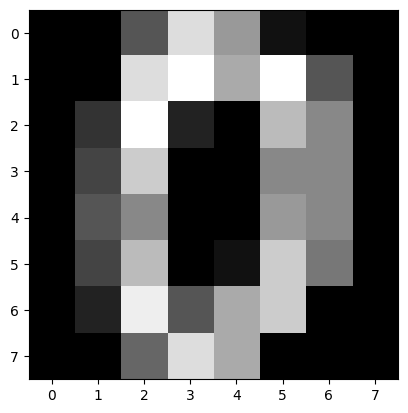

In [19]:
plt.imshow(image_values.reshape(8, 8), cmap = 'gray')

*Not the correct way to format your data*

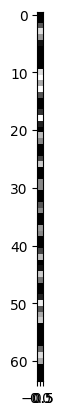

In [21]:
plt.imshow(image_values.reshape(64, 1), cmap = 'gray')

***Subplot Creation***

We're now going to create a five-by-five subplot. The way to create a subplot is by utilizing the dot subplot command, specifying how many rows you want, how many columns you want. The one here is an index, so out of our five plots, this is saying that this is the first one. The next thing we have to do is we have to create our image values. This bit of code are the image values for our first image, as you can see here. What this code is doing is we're specifying that we want the first image and we want its label, and we are assigning it to the variable image_label. And then from here, we're visualizing our image, and as before, we're reshaping our array to be eight-by-eight. Next, we're going to insert a title on our plot, so that we know what the image is supposed to be of. From here, the next bit of code says that this is going to be the second image in our subplot. We also want the image at index one. We want the label for the image at index one, and similarly, we're going to do the same thing for the third image, the fourth image, and the fifth image. And as you see here, we have five plots side by side. As you've probably noticed in the code, we seem to have a lot of duplication of effort. 
#copy from original source

Text(0.5, 1.0, 'Label: 4')

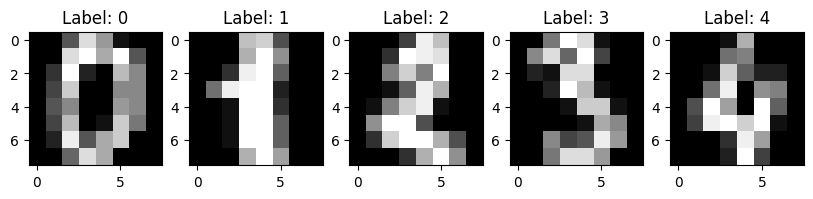

In [22]:
# There is a large amount of replicated code

plt.figure(figsize=(10,2))

## The first image
plt.subplot(1, 5, 1)
image_values = df.loc[0, pixel_colnames].values
image_label = df.loc[0, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The second image
plt.subplot(1, 5, 2)
image_values = df.loc[1, pixel_colnames].values
image_label = df.loc[1, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The third image
plt.subplot(1, 5, 3)
image_values = df.loc[2, pixel_colnames].values
image_label = df.loc[2, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The fourth image
plt.subplot(1, 5, 4)
image_values = df.loc[3, pixel_colnames].values
image_label = df.loc[3, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The fifth image
plt.subplot(1, 5, 5)
image_values = df.loc[4, pixel_colnames].values
image_label = df.loc[4, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

***Using a for loop***

Let's eliminate that with a for loop. 

In [ ]:
# range(0,5) produces a sequence of integers from 0
# up to but not including 5
list(range(0,5))

In this code, what range is doing is in the first iteration, zero is assigned temporarily to the variable index. We're doing one plus our index, which happens to be one, so we're saying that this is the first subplot. What this next code is doing is it's saying that we want all the pixel intensity values for the row with the index label of zero. In the next iteration of the loop, we're taking one, and we're temporarily assigning it to the variable index. We're doing one plus one, which is two, which is saying that this is the second subplot. And what this next bit of code is doing is it's saying that we want all the pixel intensity values for the index label of one. A similar process happens for the rest of the for loop. As you see here, we now have our images side by side with a lot less code. 


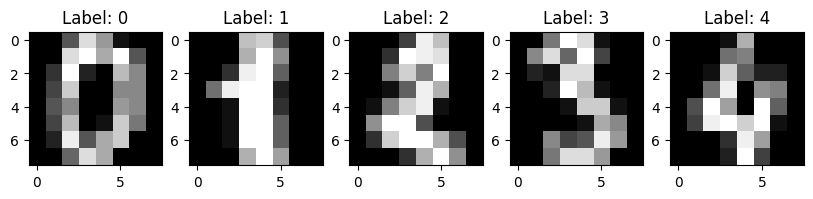

In [24]:
# This is a lot less code

plt.figure(figsize=(10,2))
for index in range(0, 5):

    plt.subplot(1, 5, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(8,8), cmap ='gray')
    plt.title('Label: ' + str(image_label))

``It's important to note that there are cases where we can use a lot less code by utilizing for loops.``